[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arvidl/ELMED219-2026/blob/main/Lab1-NetworkSci-PSN/notebooks/04-pasient_likhetsnettverk_IQ.ipynb)


Versjon 30.11.2025, A. Lundervold

(inspirert fra Astri J. Lundervold og Kenneth Hugdahl)

# Pasient-likhetsnettverk basert på intelligenstesting (WAIS-4)

## Presisjonsnevropsykologi: Fra IQ-skårer til persontilpasset kognitiv (re)habilitering

---

### 🎯 Læringsmål

Etter denne notebooken skal du kunne:

1. **Forstå WAIS-4 testbatteriet** og dets hierarkiske struktur
2. **Simulere realistiske IQ-data** basert på populasjonsnormer
3. **Bygge pasient-likhetsnettverk** på ulike granularitetsnivåer
4. **Identifisere kognitive profiler** gjennom nettverksanalyse
5. **Anvende community detection** for å oppdage undergrupper
6. **Reflektere over paralleller** mellom human intelligens (HI) og kunstig intelligens (AI)

---

### 🧠 Hva er intelligens?

> *"Hvis AI er 'intelligent', bør den tilnærme seg human intelligens, siden det ikke finnes noen annen kjent intelligens å sammenligne med. Spørsmålet blir da: **Hva er human intelligens?**"*

Human intelligens konseptualiseres best gjennom en **operasjonell definisjon**: Det er det som måles av en IQ-test. Den mest brukte testen for voksne er **Wechsler Adult Intelligence Scale** (WAIS), nå i sin fjerde versjon (WAIS-IV).

#### Interessante observasjoner:

| Aspekt | Human intelligens (HI) | Kunstig intelligens (AI) |
|--------|------------------------|-------------------------|
| **Natur** | Kvantitativt, dimensjonalt (IQ-skåre) | Ofte kvalitativt, kategorisk ("intelligent eller ikke") |
| **Måling** | Standardiserte tester, normalfordelt | Benchmarks, oppgave-spesifikke metrikker |
| **Variasjon** | Kontinuerlig spekter | Ofte binært: "fungerer/fungerer ikke" |
| **Profiler** | Ulike styrker og svakheter | Spesialisert el. smal AI vs. generell AI (AGI) |

---

### 📊 WAIS-4 Strukturen

WAIS-4 har en hierarkisk struktur:

```
                          ┌───────────────────┐
                          │    Fullskala IQ   │
                          │      (FSIQ)       │
                          └─────────┬─────────┘
                                    │
               ┌────────────────────┴────────────────────┐
               │                                         │
      ┌────────┴────────┐                       ┌────────┴────────┐
      │    Verbal IQ    │                       │  Performance IQ │
      │      (VIQ)      │                       │      (PIQ)      │
      │   [Verbal IK]   │                       │ [Utførings-IK]  │
      └────────┬────────┘                       └────────┬────────┘
               │                                         │
      ┌────────┴────────┐                  ┌─────────────┴─────────────┐
      │                 │                  │                           │
 ┌────┴────┐       ┌────┴────┐        ┌────┴────┐               ┌──────┴──────┐
 │   VCI   │       │   WMI   │        │   POI   │               │     PSI     │
 │ Verbal  │       │ Working │        │Perceptual│              │ Processing  │
 │Compreh. │       │ Memory  │        │  Organ.  │              │   Speed     │
 │─────────│       │─────────│        │──────────│              │─────────────│
 │ [Verbal │       │[Arbeids-│        │[Persept. │              │[Prossesser- │
 │forståel-│       │hukommel-│        │organiser-│              │  ings-      │
 │   se]   │       │   se]   │        │   ing]   │              │ hastighet]  │
 └────┬────┘       └────┬────┘        └────┬────┘               └──────┬──────┘
      │                 │                  │                           │
   ┌──┴──┐           ┌──┴──┐           ┌──┴──┐                     ┌──┴──┐
   │Item │           │Item │           │Item │                     │Item │
   │skår │           │skår │           │skår │                     │skår │
   └─────┘           └─────┘           └─────┘                     └─────┘
```

#### De fire indeksene:

| Indeks | Forkortelse | Måler | Deltester |
|--------|-------------|-------|----------|
| **Verbal Comprehension Index** | VCI | Verbal resonnering, ordforråd | Vocabulary, Similarities, Information, Comprehension |
| **Working Memory Index** | WMI | Arbeidshukommelse | Arithmetic, Digit Span, Letter-Number Sequencing |
| **Perceptual Organization Index** | POI | Visuospatial prosessering | Picture Completion, Block Design, Matrix Reasoning |
| **Processing Speed Index** | PSI | Prosesseringshastighet | Digit Symbol-Coding, Symbol Search, Cancellation |

---

### 🏥 Klinisk relevans

Hvorfor er pasient-likhetsnettverk (PSN) nyttig i intelligens-sammenheng?

1. **Presisjonsnevropsykologi**: Identifisere pasienter med lignende kognitive profiler for persontilpasset behandling
2. **Styrker og svakheter**: Avdekke mønstre i kognitive profiler for tilpassede treningsopplegg
3. **Yrkesrettledning**: Koble kognitive profiler til egnede yrkesvalg
4. **Undergrupper**: Identifisere subtyper innenfor populasjoner med høy/lav IQ
5. **Rehabilitering**: Målrette kognitiv trening basert på lignende pasienters respons

> 💡 **Presisjonsnevropsykologi** er den nevropsykologiske ekvivalenten til presisjonsmedisin: "Pasienter som ligner deg responderte best på denne type kognitiv trening."

---


## 1. Oppsett og import av biblioteker


In [1]:
# ============================================================================
# IMPORT AV BIBLIOTEKER
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from scipy.spatial.distance import pdist, squareform
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings

# Community detection
try:
    import community.community_louvain as community_louvain
    COMMUNITY_AVAILABLE = True
except ImportError:
    print("⚠️ python-louvain ikke installert. Installér med: pip install python-louvain")
    print("   Bruker NetworkX sin innebygde community detection i stedet.")
    COMMUNITY_AVAILABLE = False

# Visuelle innstillinger
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12
warnings.filterwarnings('ignore')

# Reproduserbarhet
np.random.seed(2025)

print("✓ Alle biblioteker lastet inn!")
print(f"  • NumPy versjon: {np.__version__}")
print(f"  • NetworkX versjon: {nx.__version__}")


✓ Alle biblioteker lastet inn!
  • NumPy versjon: 2.2.6
  • NetworkX versjon: 3.4.2


---

## 2. Simulering av WAIS-4 data

### 2.1 Definisjoner og parametere

Vi simulerer **n = 500 individer** med:
- **Demografiske variabler**: Alder (16-90 år), kjønn, utdanningsnivå
- **Item-skårer**: Skårer på hver deltest (normalisert, μ=10, σ=3)
- **Indeksskårer**: VCI, WMI, POI, PSI (μ=100, σ=15)
- **Sammensatte skårer**: VIQ, PIQ, FSIQ (μ=100, σ=15)

#### Realistisk korrelasjonstruktur

IQ-komponenter korrelerer positivt med hverandre (den såkalte "positive manifold"). Vi simulerer dette med en latent g-faktor og domenespesifikke faktorer.


In [2]:
# ============================================================================
# WAIS-4 TESTSTRUKTUR
# ============================================================================

# Definer deltestene for hver indeks
WAIS_STRUCTURE = {
    'VCI': ['Vocabulary', 'Similarities', 'Information', 'Comprehension'],
    'WMI': ['Arithmetic', 'Digit_Span', 'Letter_Number_Seq'],
    'POI': ['Picture_Completion', 'Block_Design', 'Matrix_Reasoning'],
    'PSI': ['Digit_Symbol_Coding', 'Symbol_Search', 'Cancellation']
}

# Hvilke indekser tilhører hvilken overordnet dimensjon
VIQ_INDICES = ['VCI', 'WMI']  # Verbal IQ
PIQ_INDICES = ['POI', 'PSI']  # Performance IQ

# Alle deltester (item-nivå)
ALL_SUBTESTS = []
for index, subtests in WAIS_STRUCTURE.items():
    ALL_SUBTESTS.extend(subtests)

print(f"📋 WAIS-4 Struktur:")
print(f"   • 4 indekser: {list(WAIS_STRUCTURE.keys())}")
print(f"   • {len(ALL_SUBTESTS)} deltester totalt")
print()
for index, subtests in WAIS_STRUCTURE.items():
    print(f"   {index}: {', '.join(subtests)}")


📋 WAIS-4 Struktur:
   • 4 indekser: ['VCI', 'WMI', 'POI', 'PSI']
   • 13 deltester totalt

   VCI: Vocabulary, Similarities, Information, Comprehension
   WMI: Arithmetic, Digit_Span, Letter_Number_Seq
   POI: Picture_Completion, Block_Design, Matrix_Reasoning
   PSI: Digit_Symbol_Coding, Symbol_Search, Cancellation


### 2.2 Simuleringsfunksjon

Vi bruker en faktormodell for å generere realistisk korrelerte data:

$$X_{ij} = \lambda_g \cdot g_i + \lambda_s \cdot s_{ij} + \epsilon_{ij}$$

der:
- $g_i$ = generell intelligens (g-faktor) for individ $i$
- $s_{ij}$ = domenespesifikk faktor for individ $i$ på domene $j$
- $\epsilon_{ij}$ = tilfeldig feil
- $\lambda_g, \lambda_s$ = faktorladninger


In [3]:
# ============================================================================
# SIMULERING AV WAIS-4 DATA
# ============================================================================

def simulate_wais4_data(n_individuals=500, seed=2025):
    """
    Simuler realistiske WAIS-4 data for n individer.
    
    Returnerer en DataFrame med:
    - Demografiske variabler (alder, kjønn, utdanning)
    - Item-skårer for alle 13 deltester
    - Indeksskårer (VCI, WMI, POI, PSI)
    - VIQ, PIQ, og FSIQ
    """
    np.random.seed(seed)
    
    # --- 1. DEMOGRAFISKE VARIABLER ---
    # Alder: Normalfordelt rundt 45 år med SD=15, klippet til 16-90
    age = np.clip(np.random.normal(45, 15, n_individuals), 16, 90).astype(int)
    
    # Kjønn: 50/50 fordeling
    gender = np.random.choice(['M', 'F'], n_individuals)
    
    # Utdanning: 1-5 skala (1=grunnskole, 5=doktorgrad)
    education = np.random.choice([1, 2, 3, 4, 5], n_individuals, 
                                  p=[0.10, 0.25, 0.35, 0.20, 0.10])
    
    # --- 2. LATENTE FAKTORER ---
    # g-faktor (generell intelligens)
    g_factor = np.random.normal(0, 1, n_individuals)
    
    # Domenespesifikke faktorer
    domain_factors = {
        'VCI': np.random.normal(0, 1, n_individuals),
        'WMI': np.random.normal(0, 1, n_individuals),
        'POI': np.random.normal(0, 1, n_individuals),
        'PSI': np.random.normal(0, 1, n_individuals)
    }
    
    # --- 3. ITEM-SKÅRER (μ=10, σ=3) ---
    item_scores = {}
    
    # Faktorladninger
    g_loading = 0.6  # Ladning på g-faktor
    domain_loading = 0.5  # Ladning på domenefaktor
    error_loading = 0.3  # Tilfeldig variasjon
    
    for index, subtests in WAIS_STRUCTURE.items():
        for subtest in subtests:
            # Generer skåre basert på faktormodell
            raw_score = (g_loading * g_factor + 
                        domain_loading * domain_factors[index] + 
                        error_loading * np.random.normal(0, 1, n_individuals))
            
            # Transformer til standardisert skåre (μ=10, σ=3)
            item_scores[subtest] = np.clip(10 + 3 * raw_score, 1, 19).astype(int)
    
    # --- 4. ALDERSRELATERT NEDGANG ---
    # Processing speed og working memory synker med alder
    age_effect = (age - 45) / 45  # Normalisert alderseffekt
    
    for subtest in WAIS_STRUCTURE['PSI']:
        item_scores[subtest] = np.clip(
            item_scores[subtest] - (2 * age_effect).astype(int), 1, 19
        )
    
    for subtest in WAIS_STRUCTURE['WMI']:
        item_scores[subtest] = np.clip(
            item_scores[subtest] - (1 * age_effect).astype(int), 1, 19
        )
    
    # --- 5. UTDANNINGSEFFEKT ---
    # VCI øker med utdanning
    edu_effect = (education - 3) * 0.5
    for subtest in WAIS_STRUCTURE['VCI']:
        item_scores[subtest] = np.clip(
            item_scores[subtest] + edu_effect.astype(int), 1, 19
        )
    
    # --- 6. BEREGN INDEKSSKÅRER (μ=100, σ=15) ---
    index_scores = {}
    for index, subtests in WAIS_STRUCTURE.items():
        # Gjennomsnitt av deltestskårer, transformert til indeksskåre
        subtest_mean = np.mean([item_scores[s] for s in subtests], axis=0)
        index_scores[index] = np.clip(
            100 + 15 * (subtest_mean - 10) / 3, 40, 160
        ).astype(int)
    
    # --- 7. BEREGN VIQ, PIQ, FSIQ ---
    VIQ = np.clip(
        100 + 15 * np.mean([(index_scores[i] - 100) / 15 for i in VIQ_INDICES], axis=0),
        40, 160
    ).astype(int)
    
    PIQ = np.clip(
        100 + 15 * np.mean([(index_scores[i] - 100) / 15 for i in PIQ_INDICES], axis=0),
        40, 160
    ).astype(int)
    
    FSIQ = np.clip(
        100 + 15 * np.mean([(VIQ - 100) / 15, (PIQ - 100) / 15], axis=0),
        40, 160
    ).astype(int)
    
    # --- 8. OPPRETT DATAFRAME ---
    data = {
        'ID': [f'P{str(i+1).zfill(4)}' for i in range(n_individuals)],
        'Age': age,
        'Gender': gender,
        'Education': education
    }
    
    # Legg til item-skårer
    for subtest, scores in item_scores.items():
        data[subtest] = scores
    
    # Legg til indeksskårer
    for index, scores in index_scores.items():
        data[index] = scores
    
    # Legg til VIQ, PIQ, FSIQ
    data['VIQ'] = VIQ
    data['PIQ'] = PIQ
    data['FSIQ'] = FSIQ
    
    return pd.DataFrame(data)

# Generer datasettet
df = simulate_wais4_data(n_individuals=500)

print(f"✓ Simulert datasett med {len(df)} individer")
print(f"  Kolonner: {list(df.columns)}")
print()
df.head(10)


✓ Simulert datasett med 500 individer
  Kolonner: ['ID', 'Age', 'Gender', 'Education', 'Vocabulary', 'Similarities', 'Information', 'Comprehension', 'Arithmetic', 'Digit_Span', 'Letter_Number_Seq', 'Picture_Completion', 'Block_Design', 'Matrix_Reasoning', 'Digit_Symbol_Coding', 'Symbol_Search', 'Cancellation', 'VCI', 'WMI', 'POI', 'PSI', 'VIQ', 'PIQ', 'FSIQ']



,ID,Age,Gender,Education,Vocabulary,Similarities,Information,Comprehension,Arithmetic,Digit_Span,...,Digit_Symbol_Coding,Symbol_Search,Cancellation,VCI,WMI,POI,PSI,VIQ,PIQ,FSIQ
0,P0001,43,F,3,7,7,9,9,9,9,...,10,11,11,90,96,105,103,93,104,98
1,P0002,56,M,2,15,15,15,14,13,14,...,10,13,13,123,115,115,110,119,112,115
2,P0003,23,F,4,11,12,11,11,11,12,...,10,9,11,106,108,113,100,107,106,106
3,P0004,35,M,5,13,14,14,14,14,13,...,12,13,15,118,116,120,116,117,118,117
4,P0005,43,F,4,6,8,8,8,6,6,...,12,13,15,87,80,101,116,83,108,95
5,P0006,77,F,4,12,9,8,8,6,7,...,9,8,8,96,83,86,91,89,88,88
6,P0007,65,F,3,9,10,10,11,9,10,...,9,8,9,100,95,81,93,97,87,92
7,P0008,41,M,5,14,14,14,13,9,8,...,11,8,7,118,88,90,93,103,91,97
8,P0009,56,F,3,14,12,14,12,12,11,...,8,8,7,115,108,101,88,111,94,102
9,P0010,48,M,3,10,10,8,9,4,5,...,10,9,12,96,73,85,101,84,93,88


### 2.3 Deskriptiv statistikk


In [4]:
# ============================================================================
# DESKRIPTIV STATISTIKK
# ============================================================================

print("="*60)
print("DEMOGRAFISKE VARIABLER")
print("="*60)
print(f"\nAlder: M = {df['Age'].mean():.1f}, SD = {df['Age'].std():.1f}, Range = {df['Age'].min()}-{df['Age'].max()}")
print(f"\nKjønn:")
print(df['Gender'].value_counts())
print(f"\nUtdanning (1-5):")
print(df['Education'].value_counts().sort_index())

print("\n" + "="*60)
print("IQ-SKÅRER")
print("="*60)

iq_vars = ['VCI', 'WMI', 'POI', 'PSI', 'VIQ', 'PIQ', 'FSIQ']
iq_stats = df[iq_vars].describe().T[['mean', 'std', 'min', 'max']]
iq_stats.columns = ['M', 'SD', 'Min', 'Max']
print(iq_stats.round(1))


DEMOGRAFISKE VARIABLER

Alder: M = 43.7, SD = 14.3, Range = 16-88

Kjønn:
Gender
M    260
F    240
Name: count, dtype: int64

Utdanning (1-5):
Education
1     41
2    122
3    177
4    108
5     52
Name: count, dtype: int64

IQ-SKÅRER
         M    SD   Min    Max
VCI   98.1  12.6  55.0  132.0
WMI   97.5  12.3  63.0  136.0
POI   97.0  11.8  60.0  135.0
PSI   97.4  12.3  60.0  138.0
VIQ   97.5  11.1  59.0  127.0
PIQ   96.9  10.5  65.0  130.0
FSIQ  97.0   9.9  64.0  126.0


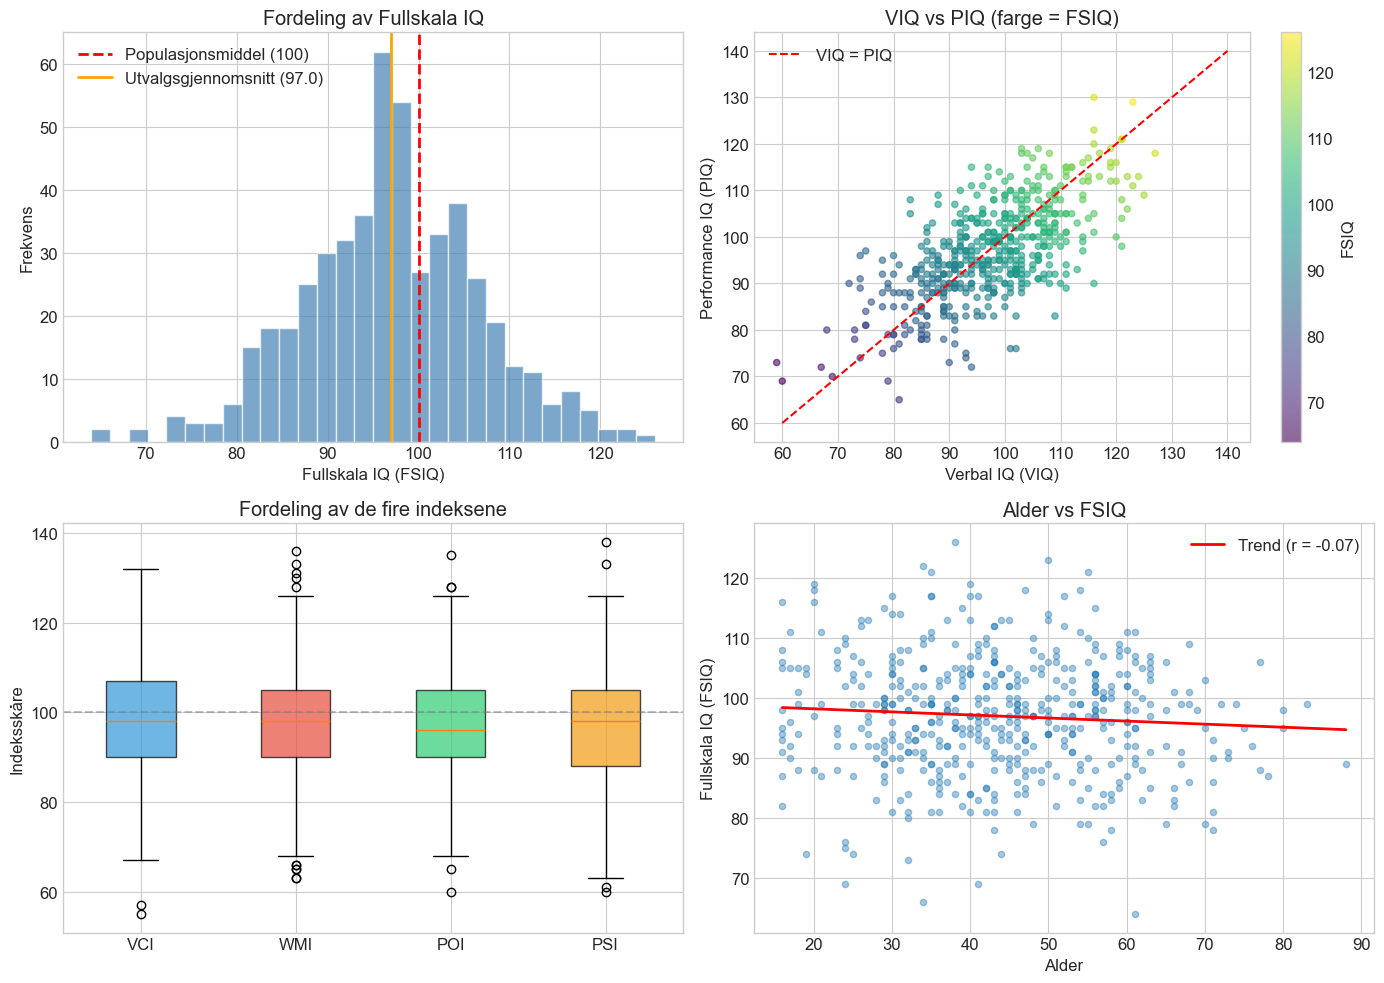


Figur 1: Deskriptiv oversikt over IQ-data.
  (a) FSIQ-fordelingen viser en tilnærmet normalfordeling rundt 100.
  (b) VIQ vs PIQ viser positiv korrelasjon, men med individuell variasjon.
  (c) De fire indeksene har sammenlignbare fordelinger.
  (d) FSIQ viser en svak negativ trend med alder (primært pga. PSI og WMI).


In [5]:
# ============================================================================
# VISUALISERING AV IQ-FORDELING
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. FSIQ Fordeling
ax1 = axes[0, 0]
ax1.hist(df['FSIQ'], bins=30, color='steelblue', edgecolor='white', alpha=0.7)
ax1.axvline(100, color='red', linestyle='--', linewidth=2, label='Populasjonsmiddel (100)')
ax1.axvline(df['FSIQ'].mean(), color='orange', linestyle='-', linewidth=2, label=f'Utvalgsgjennomsnitt ({df["FSIQ"].mean():.1f})')
ax1.set_xlabel('Fullskala IQ (FSIQ)')
ax1.set_ylabel('Frekvens')
ax1.set_title('Fordeling av Fullskala IQ')
ax1.legend()

# 2. VIQ vs PIQ
ax2 = axes[0, 1]
scatter = ax2.scatter(df['VIQ'], df['PIQ'], c=df['FSIQ'], cmap='viridis', alpha=0.6, s=20)
ax2.plot([60, 140], [60, 140], 'r--', label='VIQ = PIQ')
ax2.set_xlabel('Verbal IQ (VIQ)')
ax2.set_ylabel('Performance IQ (PIQ)')
ax2.set_title('VIQ vs PIQ (farge = FSIQ)')
plt.colorbar(scatter, ax=ax2, label='FSIQ')
ax2.legend()

# 3. De fire indeksene
ax3 = axes[1, 0]
index_data = df[['VCI', 'WMI', 'POI', 'PSI']]
bp = ax3.boxplot([index_data[col] for col in index_data.columns], 
                  labels=['VCI', 'WMI', 'POI', 'PSI'],
                  patch_artist=True)
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax3.axhline(100, color='gray', linestyle='--', alpha=0.5)
ax3.set_ylabel('Indeksskåre')
ax3.set_title('Fordeling av de fire indeksene')

# 4. Alder vs FSIQ
ax4 = axes[1, 1]
ax4.scatter(df['Age'], df['FSIQ'], alpha=0.4, s=20)
z = np.polyfit(df['Age'], df['FSIQ'], 1)
p = np.poly1d(z)
ax4.plot(sorted(df['Age']), p(sorted(df['Age'])), 'r-', linewidth=2, label=f'Trend (r = {np.corrcoef(df["Age"], df["FSIQ"])[0,1]:.2f})')
ax4.set_xlabel('Alder')
ax4.set_ylabel('Fullskala IQ (FSIQ)')
ax4.set_title('Alder vs FSIQ')
ax4.legend()

plt.tight_layout()
plt.show()

print("")
print("Figur 1: Deskriptiv oversikt over IQ-data.")
print("  (a) FSIQ-fordelingen viser en tilnærmet normalfordeling rundt 100.")
print("  (b) VIQ vs PIQ viser positiv korrelasjon, men med individuell variasjon.")
print("  (c) De fire indeksene har sammenlignbare fordelinger.")
print("  (d) FSIQ viser en svak negativ trend med alder (primært pga. PSI og WMI).")


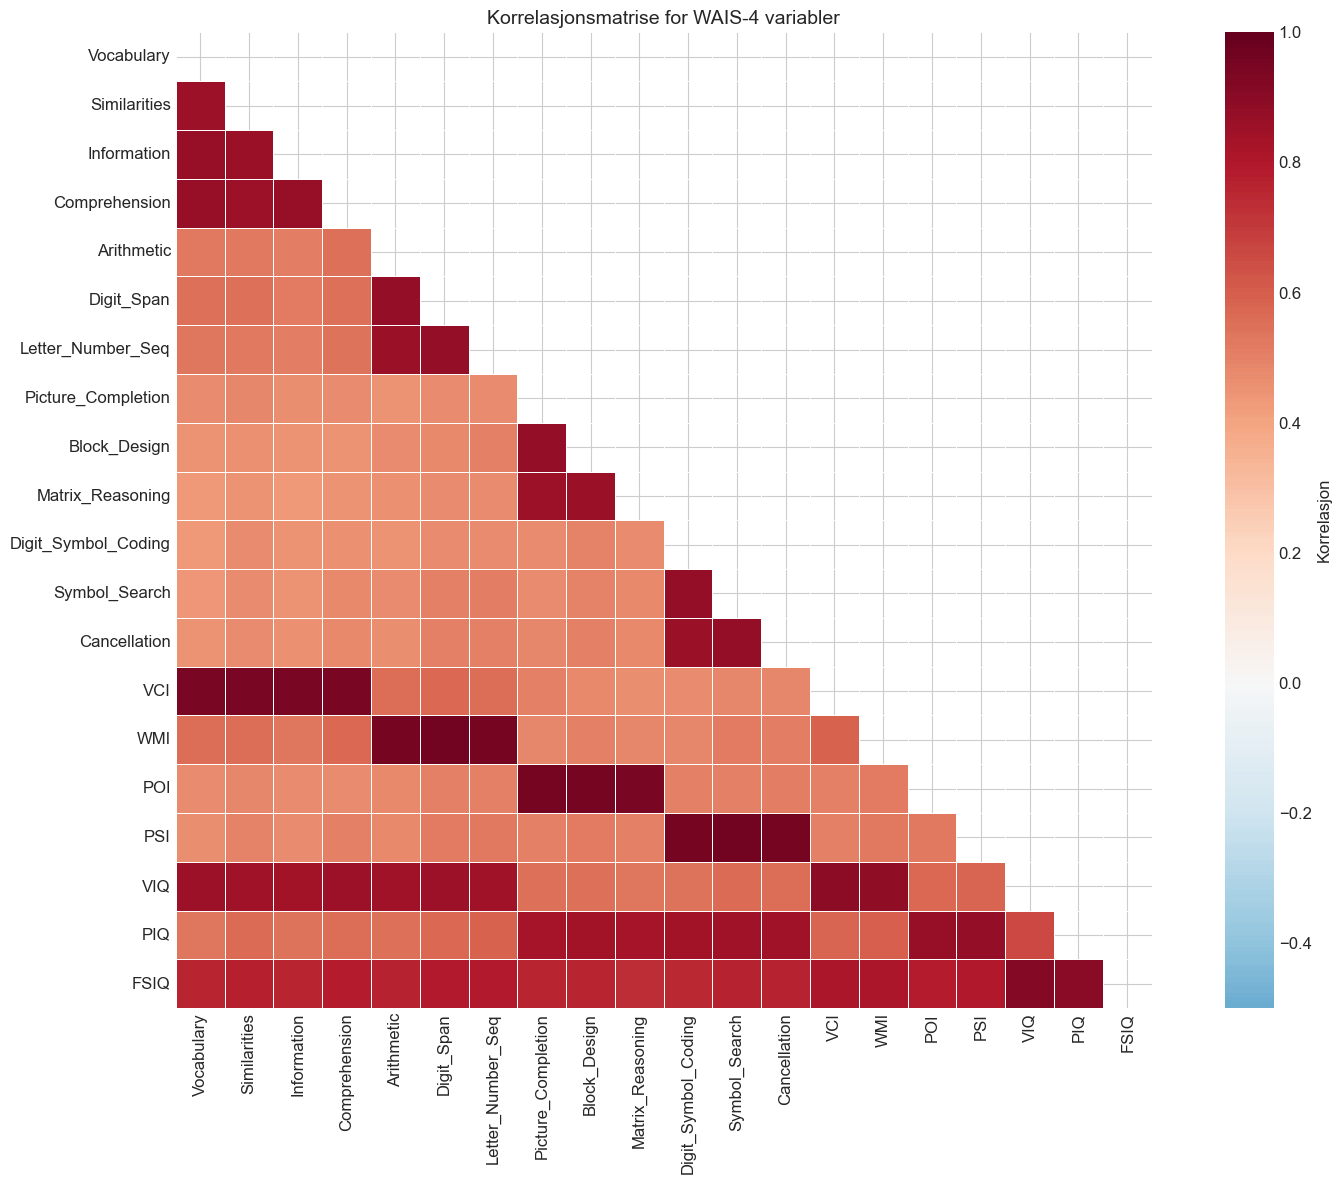


Figur 2: Korrelasjonsmatrise for alle WAIS-4 variabler.
  Mønsteret viser 'positive manifold' - alle kognitive mål korrelerer positivt.
  Sterkest korrelasjon innad i hver indeks, som forventet.
  Dette reflekterer den underliggende g-faktoren (generell intelligens).


In [6]:
# ============================================================================
# KORRELASJONSMATRISE
# ============================================================================

# Velg ut IQ-relaterte variabler
corr_vars = ALL_SUBTESTS + ['VCI', 'WMI', 'POI', 'PSI', 'VIQ', 'PIQ', 'FSIQ']
corr_matrix = df[corr_vars].corr()

plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, vmin=-0.5, vmax=1,
            cbar_kws={'label': 'Korrelasjon'})
plt.title('Korrelasjonsmatrise for WAIS-4 variabler', fontsize=14)
plt.tight_layout()
plt.show()

print("")
print("Figur 2: Korrelasjonsmatrise for alle WAIS-4 variabler.")
print("  Mønsteret viser 'positive manifold' - alle kognitive mål korrelerer positivt.")
print("  Sterkest korrelasjon innad i hver indeks, som forventet.")
print("  Dette reflekterer den underliggende g-faktoren (generell intelligens).")


---

## 3. Pasient-likhetsnettverk (PSN)

Nå skal vi bygge pasient-likhetsnettverk på **tre ulike granularitetsnivåer**:

| Nivå | Variabler | Antall dimensjoner | Beskrivelse |
|------|-----------|-------------------|-------------|
| **Item** | Alle 13 deltester | 13 | Mest detaljert, fanger subtile profiler |
| **Domene** | VCI, WMI, POI, PSI | 4 | Mellomliggende, fokus på kognitive domener |
| **VIQ/PIQ** | VIQ, PIQ | 2 | Grovest, skiller verbal fra non-verbal intelligens |

### 3.1 Hjelpefunksjoner


In [7]:
# ============================================================================
# HJELPEFUNKSJONER FOR PSN
# ============================================================================

def create_similarity_matrix(data, metric='euclidean'):
    """
    Beregn likhetmatrise fra featurematrise.
    
    Bruker Gaussisk kjerne: s_ij = exp(-d_ij^2 / (2*sigma^2))
    """
    # Standardiser data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    # Beregn parvise avstander
    distances = pdist(scaled_data, metric=metric)
    dist_matrix = squareform(distances)
    
    # Konverter til likheter med Gaussisk kjerne
    sigma = np.mean(distances) + 1e-8
    similarity_matrix = np.exp(-dist_matrix**2 / (2 * sigma**2))
    
    return similarity_matrix


def create_psn(similarity_matrix, threshold=None, k_nearest=10):
    """
    Bygg pasient-likhetsnettverk fra likhetmatrise.
    
    Parametere:
    - threshold: Minimum likhet for å inkludere kant (None = bruk k_nearest)
    - k_nearest: Antall nærmeste naboer å koble til
    """
    n = similarity_matrix.shape[0]
    G = nx.Graph()
    
    # Legg til noder
    G.add_nodes_from(range(n))
    
    # Legg til kanter
    for i in range(n):
        # Finn k nærmeste naboer
        neighbors = np.argsort(similarity_matrix[i])[-k_nearest-1:-1]  # Ekskluder selv
        
        for j in neighbors:
            if i != j:
                weight = similarity_matrix[i, j]
                if threshold is None or weight >= threshold:
                    G.add_edge(i, j, weight=weight)
    
    return G


def detect_communities(G):
    """
    Utfør community detection med Louvain-metoden.
    """
    if COMMUNITY_AVAILABLE:
        partition = community_louvain.best_partition(G)
        modularity = community_louvain.modularity(partition, G)
    else:
        # Fallback til NetworkX
        communities = nx.community.greedy_modularity_communities(G)
        partition = {}
        for i, comm in enumerate(communities):
            for node in comm:
                partition[node] = i
        modularity = nx.community.modularity(G, communities)
    
    return partition, modularity


def visualize_psn(G, partition, df, title, ax=None, node_color_var=None):
    """
    Visualiser pasient-likhetsnettverk.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 10))
    
    # Layout
    pos = nx.spring_layout(G, k=1/np.sqrt(G.number_of_nodes()), iterations=50, seed=42)
    
    # Farger basert på community
    n_communities = len(set(partition.values()))
    colors = plt.cm.Set3(np.linspace(0, 1, max(12, n_communities)))
    node_colors = [colors[partition[node]] for node in G.nodes()]
    
    # Nodestørrelse basert på grad
    degrees = dict(G.degree())
    node_sizes = [50 + 10 * degrees[node] for node in G.nodes()]
    
    # Tegn kanter
    edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, alpha=0.1, width=0.5, ax=ax)
    
    # Tegn noder
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, 
                          node_size=node_sizes, alpha=0.7, ax=ax)
    
    ax.set_title(title)
    ax.axis('off')
    
    return pos


print("✓ Hjelpefunksjoner definert!")


✓ Hjelpefunksjoner definert!


### 3.2 Bygg PSN på tre nivåer


In [8]:
# ============================================================================
# BYGG PSN PÅ TRE GRANULARITETSNIVÅER
# ============================================================================

# Definer featurene for hvert nivå
features_item = ALL_SUBTESTS  # 13 deltester
features_domain = ['VCI', 'WMI', 'POI', 'PSI']  # 4 indekser
features_viq_piq = ['VIQ', 'PIQ']  # 2 overordnede skårer

# Beregn likhetmatriser
print("Beregner likhetmatriser...")
sim_item = create_similarity_matrix(df[features_item])
sim_domain = create_similarity_matrix(df[features_domain])
sim_viq_piq = create_similarity_matrix(df[features_viq_piq])

# Bygg nettverk
print("Bygger nettverk...")
G_item = create_psn(sim_item, k_nearest=15)
G_domain = create_psn(sim_domain, k_nearest=15)
G_viq_piq = create_psn(sim_viq_piq, k_nearest=15)

# Community detection
print("Utfører community detection...")
partition_item, mod_item = detect_communities(G_item)
partition_domain, mod_domain = detect_communities(G_domain)
partition_viq_piq, mod_viq_piq = detect_communities(G_viq_piq)

# Oppsummering
print("\n" + "="*60)
print("NETTVERKSSTATISTIKK")
print("="*60)

networks = {
    'Item-nivå (13 dim)': (G_item, partition_item, mod_item),
    'Domene-nivå (4 dim)': (G_domain, partition_domain, mod_domain),
    'VIQ/PIQ-nivå (2 dim)': (G_viq_piq, partition_viq_piq, mod_viq_piq)
}

for name, (G, part, mod) in networks.items():
    n_comm = len(set(part.values()))
    density = nx.density(G)
    avg_clustering = nx.average_clustering(G)
    
    print(f"\n{name}:")
    print(f"  Noder: {G.number_of_nodes()}, Kanter: {G.number_of_edges()}")
    print(f"  Tetthet: {density:.3f}")
    print(f"  Gjennomsnittlig clustering: {avg_clustering:.3f}")
    print(f"  Antall communities: {n_comm}")
    print(f"  Modularitet: {mod:.3f}")


Beregner likhetmatriser...
Bygger nettverk...
Utfører community detection...

NETTVERKSSTATISTIKK

Item-nivå (13 dim):
  Noder: 500, Kanter: 5136
  Tetthet: 0.041
  Gjennomsnittlig clustering: 0.403
  Antall communities: 7
  Modularitet: 0.566

Domene-nivå (4 dim):
  Noder: 500, Kanter: 4999
  Tetthet: 0.040
  Gjennomsnittlig clustering: 0.446
  Antall communities: 8
  Modularitet: 0.595

VIQ/PIQ-nivå (2 dim):
  Noder: 500, Kanter: 4559
  Tetthet: 0.037
  Gjennomsnittlig clustering: 0.592
  Antall communities: 11
  Modularitet: 0.741


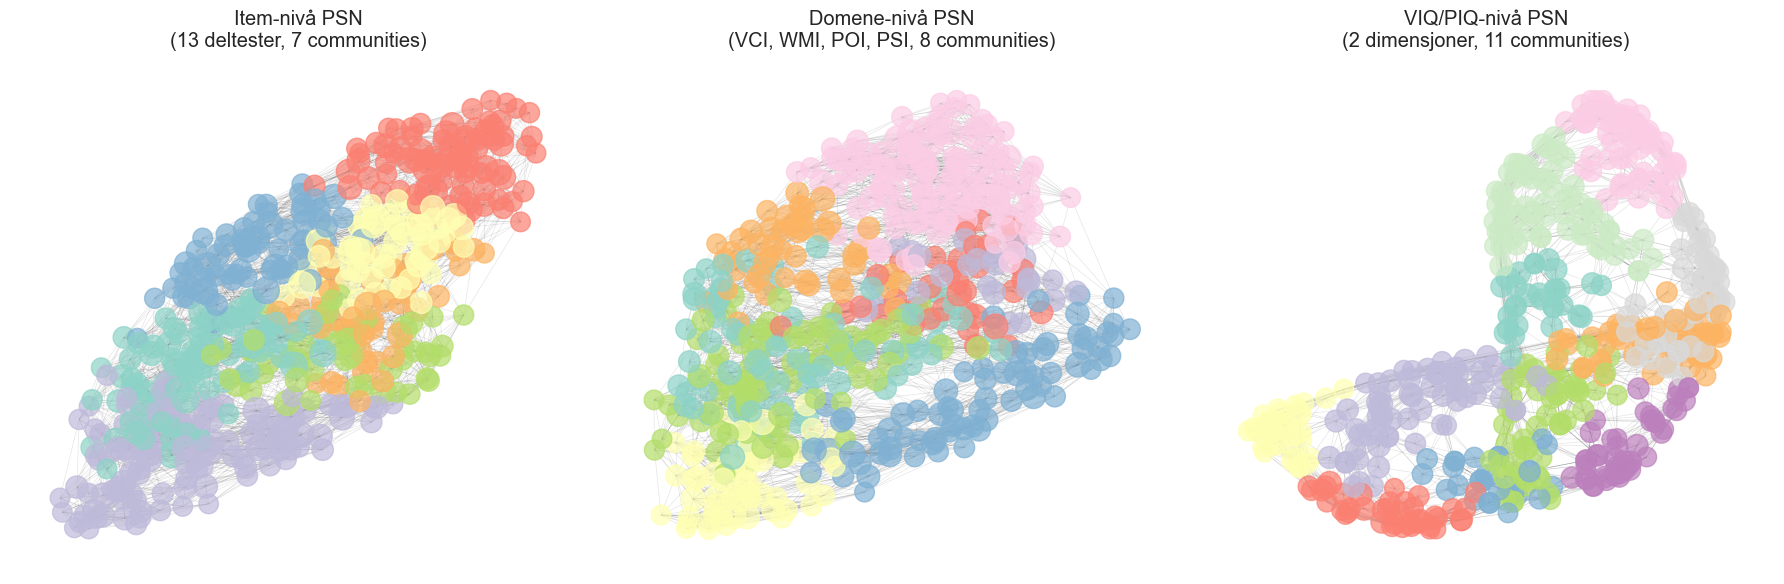


Figur 3: Pasient-likhetsnettverk på tre granularitetsnivåer.
  Farger representerer ulike communities (undergrupper).
  Nodestørrelse reflekterer antall forbindelser (grad).
  Høyere granularitet (item-nivå) gir flere og mer nyanserte communities.
  Lavere granularitet (VIQ/PIQ) gir grovere gruppering.


In [9]:
# ============================================================================
# VISUALISERING AV DE TRE NETTVERKENE
# ============================================================================

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

visualize_psn(G_item, partition_item, df, 
              f'Item-nivå PSN\n(13 deltester, {len(set(partition_item.values()))} communities)', 
              ax=axes[0])

visualize_psn(G_domain, partition_domain, df, 
              f'Domene-nivå PSN\n(VCI, WMI, POI, PSI, {len(set(partition_domain.values()))} communities)', 
              ax=axes[1])

visualize_psn(G_viq_piq, partition_viq_piq, df, 
              f'VIQ/PIQ-nivå PSN\n(2 dimensjoner, {len(set(partition_viq_piq.values()))} communities)', 
              ax=axes[2])

plt.tight_layout()
plt.show()

print("")
print("Figur 3: Pasient-likhetsnettverk på tre granularitetsnivåer.")
print("  Farger representerer ulike communities (undergrupper).")
print("  Nodestørrelse reflekterer antall forbindelser (grad).")
print("  Høyere granularitet (item-nivå) gir flere og mer nyanserte communities.")
print("  Lavere granularitet (VIQ/PIQ) gir grovere gruppering.")


### 3.3 Analyse av communities

La oss undersøke hva som karakteriserer de ulike undergruppene.


ANALYSE AV COMMUNITIES (DOMENE-NIVÅ PSN)

Community-profiler:
                    N  Alder   FSIQ    VCI    WMI    POI    PSI    VIQ    PIQ
Community_Domain                                                             
0                  77   42.4   99.5   98.5   93.5  103.8  104.1   95.8  103.7
1                  56   39.3  112.8  112.0  112.9  116.3  111.9  112.2  113.9
2                  25   41.4   93.5   89.9   99.3  100.2   86.8   94.3   93.2
3                  36   43.2   94.4  100.9  101.1   85.2   92.3  100.8   88.5
4                  71   48.3  102.6  110.9  105.4  101.5   94.5  107.9   97.7
5                  45   43.4   92.3   90.2   92.3   88.2  100.3   91.0   94.1
6                  75   42.6  102.1  100.6  105.6   97.5  106.7  102.9  101.8
7                 115   45.4   84.2   85.4   82.9   86.2   84.3   83.9   85.0


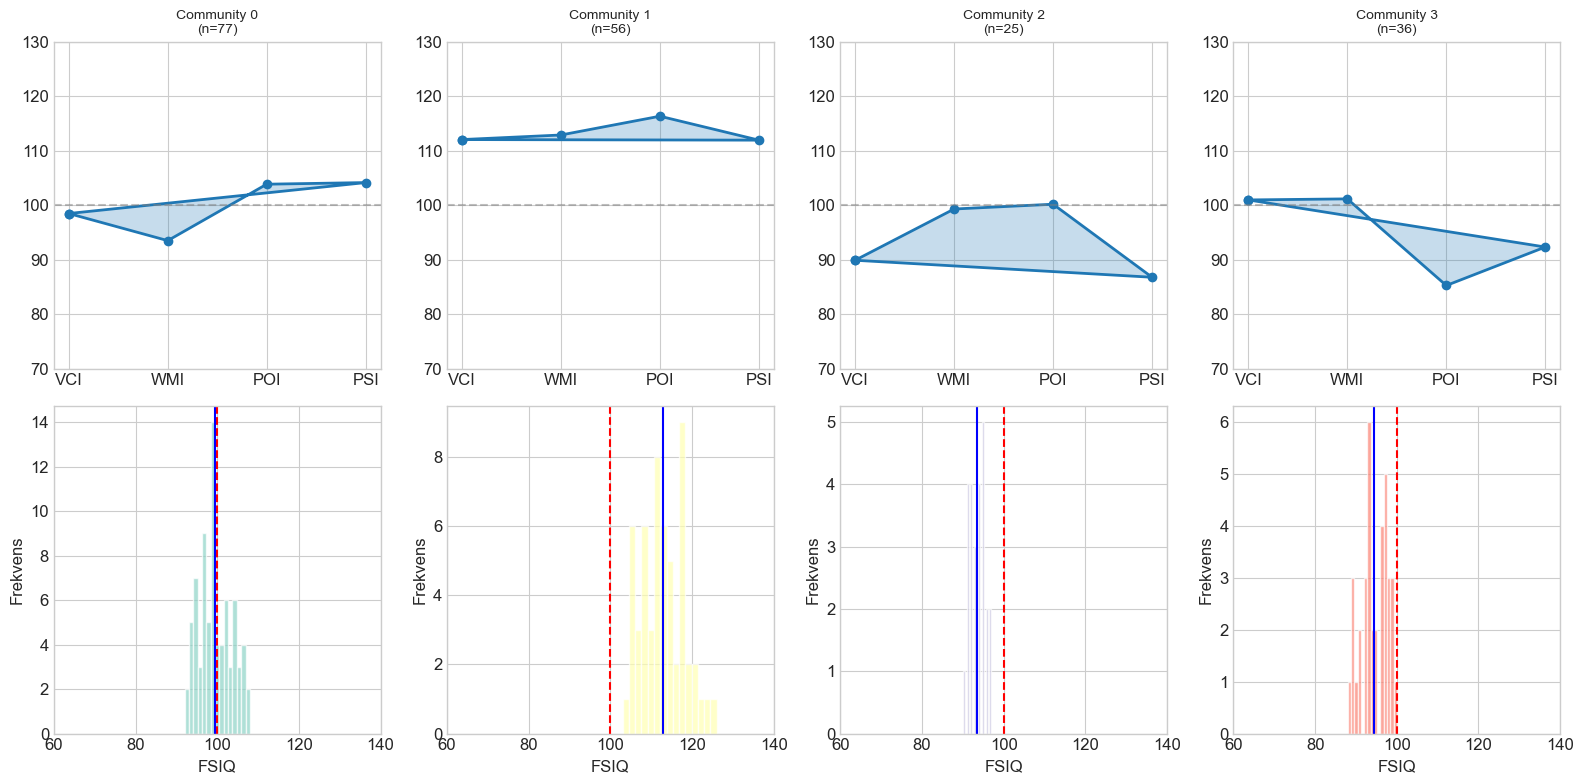


Figur 4: Kognitive profiler for de ulike communities.
  Øvre rad: Radarprofiler viser gjennomsnittlig skåre på hver indeks.
  Nedre rad: FSIQ-fordelinger med populasjonsmiddel (rød) og community-middel (blå).
  Merk: Communities kan representere ulike kognitive profiler, ikke bare IQ-nivå!


In [10]:
# ============================================================================
# COMMUNITY-ANALYSE (DOMENE-NIVÅ)
# ============================================================================

# Legg til community-tilhørighet i dataframe
df['Community_Domain'] = [partition_domain[i] for i in range(len(df))]

# Analyser hver community
print("="*70)
print("ANALYSE AV COMMUNITIES (DOMENE-NIVÅ PSN)")
print("="*70)

# Statistikk per community
community_stats = df.groupby('Community_Domain').agg({
    'ID': 'count',
    'Age': 'mean',
    'FSIQ': 'mean',
    'VCI': 'mean',
    'WMI': 'mean',
    'POI': 'mean',
    'PSI': 'mean',
    'VIQ': 'mean',
    'PIQ': 'mean'
}).round(1)

community_stats.columns = ['N', 'Alder', 'FSIQ', 'VCI', 'WMI', 'POI', 'PSI', 'VIQ', 'PIQ']
print("\nCommunity-profiler:")
print(community_stats)

# Visualiser community-profiler
n_communities = len(set(partition_domain.values()))
fig, axes = plt.subplots(2, min(4, n_communities), figsize=(16, 8))
if n_communities < 4:
    axes = np.array(axes).reshape(2, -1)

for i, comm in enumerate(sorted(set(partition_domain.values()))):
    if i >= 4:  # Maks 4 communities vises
        break
    
    comm_df = df[df['Community_Domain'] == comm]
    
    # Øvre rad: Radarprofil av indeksene
    ax1 = axes[0, i]
    categories = ['VCI', 'WMI', 'POI', 'PSI']
    values = [comm_df[cat].mean() for cat in categories]
    values += values[:1]  # Lukk sirkelen
    
    angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]
    
    ax1.fill(angles, values, alpha=0.25)
    ax1.plot(angles, values, 'o-', linewidth=2)
    ax1.set_xticks(angles[:-1])
    ax1.set_xticklabels(categories)
    ax1.set_ylim(70, 130)
    ax1.axhline(100, color='gray', linestyle='--', alpha=0.5)
    ax1.set_title(f'Community {comm}\n(n={len(comm_df)})', fontsize=10)
    
    # Nedre rad: FSIQ-fordeling
    ax2 = axes[1, i]
    ax2.hist(comm_df['FSIQ'], bins=15, color=plt.cm.Set3(i/10), edgecolor='white', alpha=0.7)
    ax2.axvline(100, color='red', linestyle='--')
    ax2.axvline(comm_df['FSIQ'].mean(), color='blue', linestyle='-')
    ax2.set_xlabel('FSIQ')
    ax2.set_ylabel('Frekvens')
    ax2.set_xlim(60, 140)

plt.tight_layout()
plt.show()

print("")
print("Figur 4: Kognitive profiler for de ulike communities.")
print("  Øvre rad: Radarprofiler viser gjennomsnittlig skåre på hver indeks.")
print("  Nedre rad: FSIQ-fordelinger med populasjonsmiddel (rød) og community-middel (blå).")
print("  Merk: Communities kan representere ulike kognitive profiler, ikke bare IQ-nivå!")


---

## 4. Kliniske anvendelser

### 4.1 Case: Identifikasjon av lignende pasienter

Tenk deg en pasient med spesifikke styrker og svakheter. Hvordan kan PSN hjelpe med presisjonsnevropsykologi?


In [11]:
# ============================================================================
# CASE-STUDIE: FINN LIGNENDE PASIENTER
# ============================================================================

def find_similar_patients(target_idx, G, similarity_matrix, df, n_similar=5):
    """
    Finn de mest lignende pasientene basert på PSN.
    """
    # Hent naboer i nettverket
    if target_idx in G:
        neighbors = list(G.neighbors(target_idx))
    else:
        neighbors = []
    
    # Sorter etter likhet
    similarities = [(n, similarity_matrix[target_idx, n]) for n in neighbors]
    similarities.sort(key=lambda x: x[1], reverse=True)
    
    return similarities[:n_similar]


def display_patient_profile(idx, df):
    """
    Vis profilen til en pasient.
    """
    patient = df.iloc[idx]
    
    print(f"\n{'='*50}")
    print(f"PASIENT: {patient['ID']}")
    print(f"{'='*50}")
    print(f"Alder: {patient['Age']}, Kjønn: {patient['Gender']}, Utdanning: {patient['Education']}")
    print(f"\nIQ-skårer:")
    print(f"  FSIQ: {patient['FSIQ']} (VIQ: {patient['VIQ']}, PIQ: {patient['PIQ']})")
    print(f"  Indekser: VCI={patient['VCI']}, WMI={patient['WMI']}, POI={patient['POI']}, PSI={patient['PSI']}")
    
    # Identifiser styrker og svakheter
    indices = ['VCI', 'WMI', 'POI', 'PSI']
    index_values = {idx: patient[idx] for idx in indices}
    mean_index = np.mean(list(index_values.values()))
    
    strengths = [k for k, v in index_values.items() if v > mean_index + 10]
    weaknesses = [k for k, v in index_values.items() if v < mean_index - 10]
    
    if strengths:
        print(f"\n  ✓ Relative styrker: {', '.join(strengths)}")
    if weaknesses:
        print(f"  ✗ Relative svakheter: {', '.join(weaknesses)}")
    
    return patient


# Velg en "målpasient" med interessant profil (f.eks. lav PSI, høy VCI)
# Finn en pasient med stor spredning mellom indeksene
df['Index_Spread'] = df[['VCI', 'WMI', 'POI', 'PSI']].std(axis=1)
target_idx = df['Index_Spread'].idxmax()  # Pasient med størst spredning

# Vis målpasienten
target_patient = display_patient_profile(target_idx, df)

# Finn lignende pasienter
print("\n" + "-"*50)
print("LIGNENDE PASIENTER (basert på domene-nivå PSN):")
print("-"*50)

similar = find_similar_patients(target_idx, G_domain, sim_domain, df, n_similar=5)

for i, (sim_idx, sim_score) in enumerate(similar, 1):
    sim_patient = df.iloc[sim_idx]
    print(f"\n{i}. {sim_patient['ID']} (likhet: {sim_score:.3f})")
    print(f"   FSIQ: {sim_patient['FSIQ']}, VCI: {sim_patient['VCI']}, WMI: {sim_patient['WMI']}, POI: {sim_patient['POI']}, PSI: {sim_patient['PSI']}")



PASIENT: P0474
Alder: 43, Kjønn: M, Utdanning: 4

IQ-skårer:
  FSIQ: 83 (VIQ: 94, PIQ: 72)
  Indekser: VCI=106, WMI=83, POI=85, PSI=60

  ✓ Relative styrker: VCI
  ✗ Relative svakheter: PSI

--------------------------------------------------
LIGNENDE PASIENTER (basert på domene-nivå PSN):
--------------------------------------------------

1. P0451 (likhet: 0.847)
   FSIQ: 83, VCI: 95, WMI: 91, POI: 78, PSI: 70

2. P0465 (likhet: 0.794)
   FSIQ: 81, VCI: 100, WMI: 71, POI: 80, PSI: 76

3. P0315 (likhet: 0.792)
   FSIQ: 92, VCI: 107, WMI: 93, POI: 95, PSI: 76

4. P0414 (likhet: 0.765)
   FSIQ: 81, VCI: 86, WMI: 80, POI: 95, PSI: 66

5. P0112 (likhet: 0.755)
   FSIQ: 81, VCI: 95, WMI: 86, POI: 71, PSI: 75


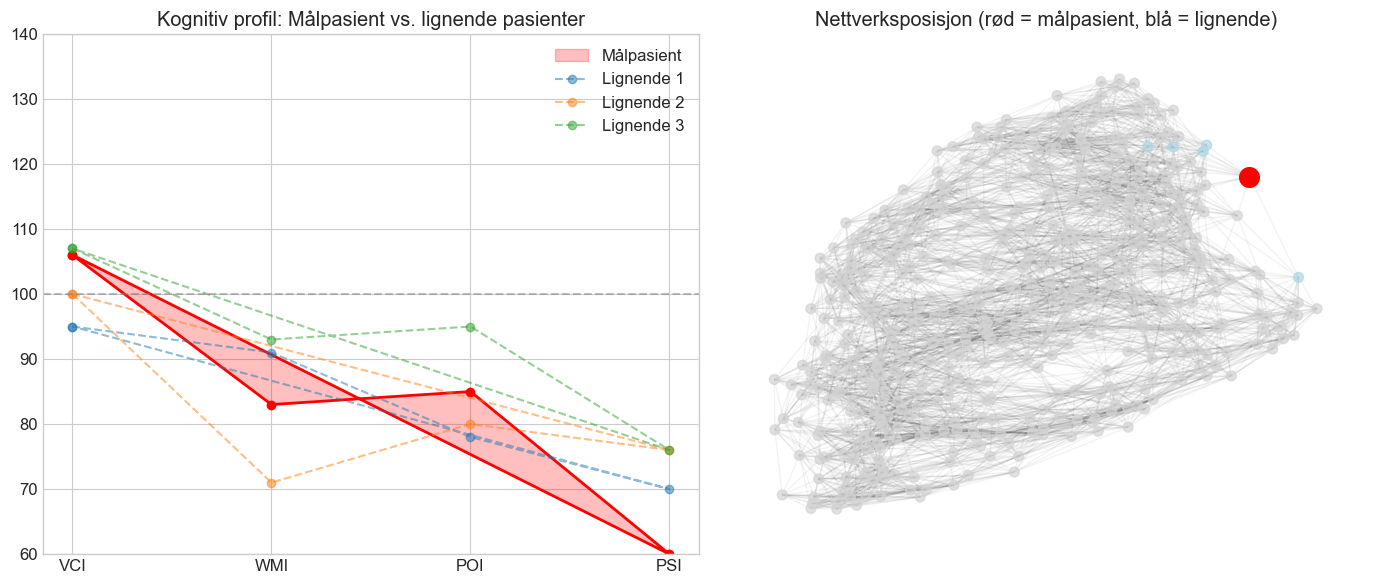


Figur 5: Case-studie - identifikasjon av lignende pasienter.
  Venstre: Radardiagram viser kognitiv profil for målpasient og lignende pasienter.
  Høyre: Målpasientens posisjon i PSN med de mest lignende naboene markert.
  Klinisk anvendelse: Disse lignende pasientene kan informere behandlingsvalg.


In [12]:
# ============================================================================
# VISUALISERING AV CASE-STUDIE
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Radar-sammenligning
ax1 = axes[0]
categories = ['VCI', 'WMI', 'POI', 'PSI']
angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

# Målpasient
target_values = [target_patient[cat] for cat in categories]
target_values += target_values[:1]
ax1.fill(angles, target_values, alpha=0.25, color='red', label='Målpasient')
ax1.plot(angles, target_values, 'o-', linewidth=2, color='red')

# Lignende pasienter
for i, (sim_idx, _) in enumerate(similar[:3]):
    sim_patient = df.iloc[sim_idx]
    sim_values = [sim_patient[cat] for cat in categories]
    sim_values += sim_values[:1]
    ax1.plot(angles, sim_values, 'o--', alpha=0.5, label=f'Lignende {i+1}')

ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(categories)
ax1.set_ylim(60, 140)
ax1.axhline(100, color='gray', linestyle='--', alpha=0.5)
ax1.legend(loc='upper right')
ax1.set_title('Kognitiv profil: Målpasient vs. lignende pasienter')

# 2. Nettverksposisjon
ax2 = axes[1]
pos = nx.spring_layout(G_domain, seed=42)

# Fargelegg alle noder grått
node_colors = ['lightgray'] * len(G_domain.nodes())

# Mål lignende pasienter
for sim_idx, _ in similar:
    node_colors[sim_idx] = 'lightblue'

# Målpasienten
node_colors[target_idx] = 'red'

# Tegn nettverk
nx.draw_networkx_edges(G_domain, pos, alpha=0.05, ax=ax2)
nx.draw_networkx_nodes(G_domain, pos, node_color=node_colors, 
                       node_size=50, alpha=0.7, ax=ax2)

# Marker målpasient større
nx.draw_networkx_nodes(G_domain, pos, nodelist=[target_idx], 
                       node_color='red', node_size=200, ax=ax2)

ax2.set_title('Nettverksposisjon (rød = målpasient, blå = lignende)')
ax2.axis('off')

plt.tight_layout()
plt.show()

print("")
print("Figur 5: Case-studie - identifikasjon av lignende pasienter.")
print("  Venstre: Radardiagram viser kognitiv profil for målpasient og lignende pasienter.")
print("  Høyre: Målpasientens posisjon i PSN med de mest lignende naboene markert.")
print("  Klinisk anvendelse: Disse lignende pasientene kan informere behandlingsvalg.")


### 4.2 Undergrupper med høy vs. lav IQ

La oss analysere om det finnes ulike "typer" av høy/lav IQ basert på kognitive profiler.


In [13]:
# ============================================================================
# ANALYSE AV HØY VS. LAV IQ-GRUPPER
# ============================================================================

# Del inn i IQ-grupper
df['IQ_Group'] = pd.cut(df['FSIQ'], 
                        bins=[0, 85, 115, 200], 
                        labels=['Lav (<85)', 'Middels (85-115)', 'Høy (>115)'])

print("Fordeling av IQ-grupper:")
print(df['IQ_Group'].value_counts().sort_index())

# Analyser communities innenfor hver IQ-gruppe
print("\n" + "="*60)
print("COMMUNITY-FORDELING INNENFOR HVER IQ-GRUPPE")
print("="*60)

for iq_group in ['Lav (<85)', 'Høy (>115)']:
    group_df = df[df['IQ_Group'] == iq_group]
    print(f"\n{iq_group} IQ (n={len(group_df)}):")
    
    comm_counts = group_df['Community_Domain'].value_counts()
    for comm, count in comm_counts.items():
        comm_profile = group_df[group_df['Community_Domain'] == comm][['VCI', 'WMI', 'POI', 'PSI']].mean()
        print(f"  Community {comm}: n={count}")
        print(f"    Profil: VCI={comm_profile['VCI']:.0f}, WMI={comm_profile['WMI']:.0f}, POI={comm_profile['POI']:.0f}, PSI={comm_profile['PSI']:.0f}")


Fordeling av IQ-grupper:
IQ_Group
Lav (<85)            61
Middels (85-115)    421
Høy (>115)           18
Name: count, dtype: int64

COMMUNITY-FORDELING INNENFOR HVER IQ-GRUPPE

Lav (<85) IQ (n=61):
  Community 7: n=61
    Profil: VCI=80, WMI=82, POI=81, PSI=81

Høy (>115) IQ (n=18):
  Community 1: n=18
    Profil: VCI=119, WMI=122, POI=116, PSI=120


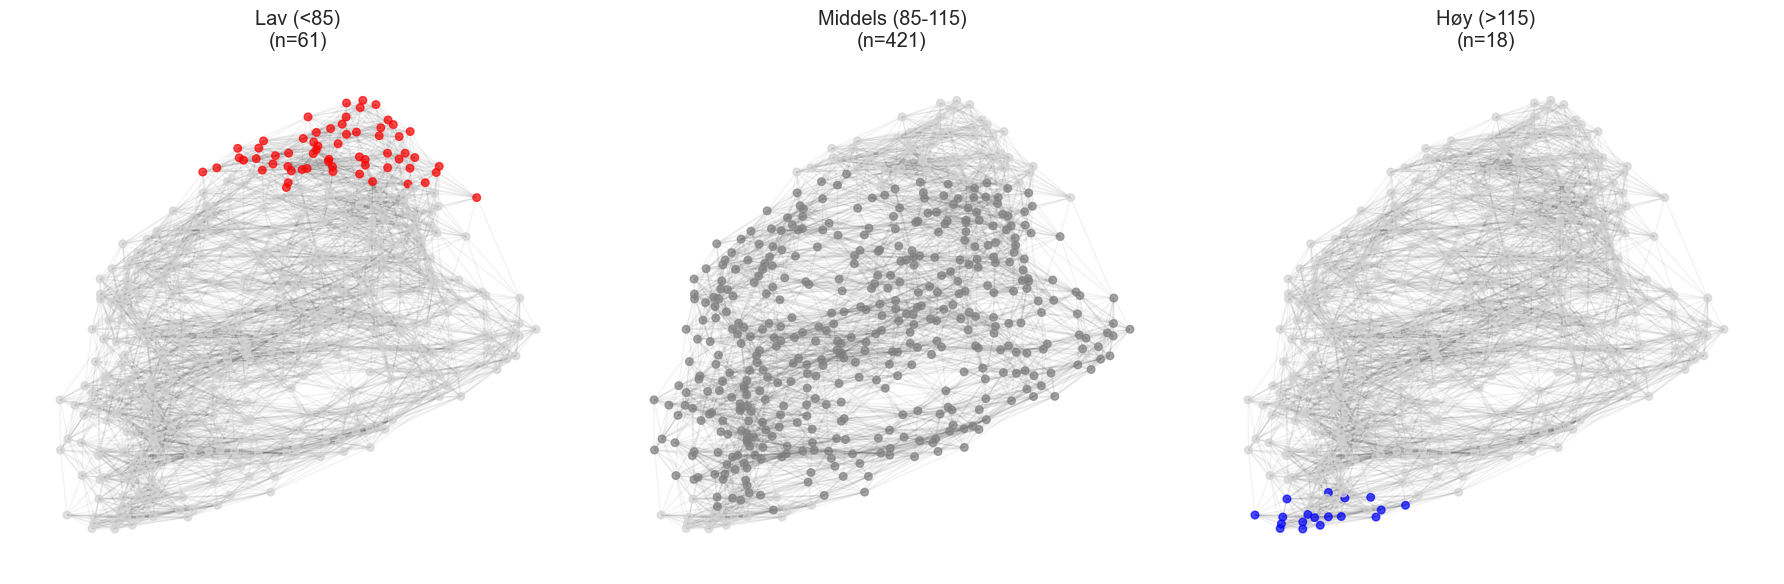


Figur 6: Fordeling av IQ-grupper i pasient-likhetsnettverket.
  Lav IQ (<85): Røde noder - spredt på tvers av communities.
  Middels IQ (85-115): Grå noder - utgjør majoriteten.
  Høy IQ (>115): Blå noder - også spredt, men kan ha distinkte profiler.

  Observasjon: Samme IQ-nivå kan innebære ulike kognitive profiler!
  Dette understreker verdien av presisjonsnevropsykologi.


In [14]:
# ============================================================================
# VISUALISERING AV IQ-GRUPPER I NETTVERKET
# ============================================================================

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Layout (samme for alle)
pos = nx.spring_layout(G_domain, seed=42)

# Fargekartet for IQ-grupper
iq_colors = {'Lav (<85)': 'red', 'Middels (85-115)': 'gray', 'Høy (>115)': 'blue'}

for i, (iq_group, color) in enumerate(iq_colors.items()):
    ax = axes[i]
    
    # Fargelegg noder
    node_colors = [iq_colors[df.iloc[node]['IQ_Group']] 
                   if df.iloc[node]['IQ_Group'] == iq_group else 'lightgray' 
                   for node in G_domain.nodes()]
    
    # Tegn
    nx.draw_networkx_edges(G_domain, pos, alpha=0.05, ax=ax)
    nx.draw_networkx_nodes(G_domain, pos, node_color=node_colors, 
                          node_size=30, alpha=0.7, ax=ax)
    
    n_group = len(df[df['IQ_Group'] == iq_group])
    ax.set_title(f'{iq_group}\n(n={n_group})')
    ax.axis('off')

plt.tight_layout()
plt.show()

print("")
print("Figur 6: Fordeling av IQ-grupper i pasient-likhetsnettverket.")
print("  Lav IQ (<85): Røde noder - spredt på tvers av communities.")
print("  Middels IQ (85-115): Grå noder - utgjør majoriteten.")
print("  Høy IQ (>115): Blå noder - også spredt, men kan ha distinkte profiler.")
print("\n  Observasjon: Samme IQ-nivå kan innebære ulike kognitive profiler!")
print("  Dette understreker verdien av presisjonsnevropsykologi.")


---

## 5. Paralleller mellom Human Intelligens og Kunstig Intelligens

La oss reflektere over likheter og forskjeller mellom hvordan vi måler og forstår HI vs. AI.


In [15]:
# ============================================================================
# KONSEPTUELL SAMMENLIGNING: HI VS. AI
# ============================================================================

print("""
╔══════════════════════════════════════════════════════════════════════════════╗
║                    HUMAN INTELLIGENS (HI) vs. KUNSTIG INTELLIGENS (AI)       ║
╠══════════════════════════════════════════════════════════════════════════════╣
║                                                                              ║
║  ASPEKT              │  HUMAN INTELLIGENS         │  KUNSTIG INTELLIGENS     ║
║ ─────────────────────┼────────────────────────────┼──────────────────────────║
║                      │                            │                          ║
║  MÅLING              │  IQ-tester (WAIS-4)        │  Benchmarks (MMLU,       ║
║                      │  Standardisert, normert    │  HumanEval, etc.)        ║
║                      │                            │                          ║
║  STRUKTUR            │  Hierarkisk (g → domener   │  Ofte task-spesifikk     ║
║                      │  → deltester)              │  eller emergent          ║
║                      │                            │                          ║
║  VARIASJON           │  Normalfordelt, kontinuerlig│ Avhenger av arkitektur, ║
║                      │  spekter i befolkningen    │  data, og skalering      ║
║                      │                            │                          ║
║  PROFILER            │  Styrker/svakheter         │  Generalist vs.          ║
║                      │  (VIQ ≠ PIQ mulig)         │  spesialist-modeller     ║
║                      │                            │                          ║
║  UTVIKLING           │  Modning → peak → nedgang  │  Skalering, RLHF,        ║
║                      │  (Flynn-effekt over gen.)  │  arkitekturendringer     ║
║                      │                            │                          ║
║  PLASTISITET         │  Trening gir begrenset     │  Fine-tuning, prompt     ║
║                      │  forbedring                │  engineering             ║
║                      │                            │                          ║
║  KONTEKST            │  Kulturelt betinget        │  Treningsdata-betinget   ║
║                      │                            │                          ║
║  GENERALISERNG       │  Transfer mellom domener   │  Out-of-distribution     ║
║                      │  (g-faktoren)              │  generalization          ║
║                      │                            │                          ║
╚══════════════════════════════════════════════════════════════════════════════╝

REFLEKSJONER:

1. G-FAKTOREN OG EMERGENTE EVNER
   • HI: Den positive manifold (alle kognitive tester korrelerer) tyder på en 
     underliggende g-faktor.
   • AI: Store språkmodeller viser "emergente" evner som oppstår ved skalering.
   • Spørsmål: Er det en analog til g-faktoren i AI?

2. PROFILER OG SPESIALISERING
   • HI: Noen har høy VIQ men lav PIQ (eller omvendt) - dette er klinisk viktig.
   • AI: Foundation models vs. fine-tuned specialists.
   • Implikasjon: Både mennesker og AI har styrker og svakheter.

3. MÅLING OG BIAS
   • HI: IQ-tester er kulturelt biased, normeringsavhengige.
   • AI: Benchmarks kan være kontaminert, task-spesifikke.
   • Felles utfordring: Hvordan måle "ekte" intelligens?

4. REHABILITERING OG FORBEDRING
   • HI: Kognitiv trening gir begrenset, men målbar effekt.
   • AI: Fine-tuning, RLHF, prompt engineering.
   • Kontrast: AI er mer "plastisk" enn human kognisjon.

5. PSN-ANALOG FOR AI?
   • Kunne vi bygge "modell-likhetsnettverk" basert på AI-modellers styrker?
   • Hvilke modeller "ligner" på hverandre i kapasitetsprofil?
   • Dette kunne informere modellvalg for spesifikke oppgaver.
""")



╔══════════════════════════════════════════════════════════════════════════════╗
║                    HUMAN INTELLIGENS (HI) vs. KUNSTIG INTELLIGENS (AI)       ║
╠══════════════════════════════════════════════════════════════════════════════╣
║                                                                              ║
║  ASPEKT              │  HUMAN INTELLIGENS         │  KUNSTIG INTELLIGENS     ║
║ ─────────────────────┼────────────────────────────┼──────────────────────────║
║                      │                            │                          ║
║  MÅLING              │  IQ-tester (WAIS-4)        │  Benchmarks (MMLU,       ║
║                      │  Standardisert, normert    │  HumanEval, etc.)        ║
║                      │                            │                          ║
║  STRUKTUR            │  Hierarkisk (g → domener   │  Ofte task-spesifikk     ║
║                      │  → deltester)              │  eller emergent          ║
║                      │   

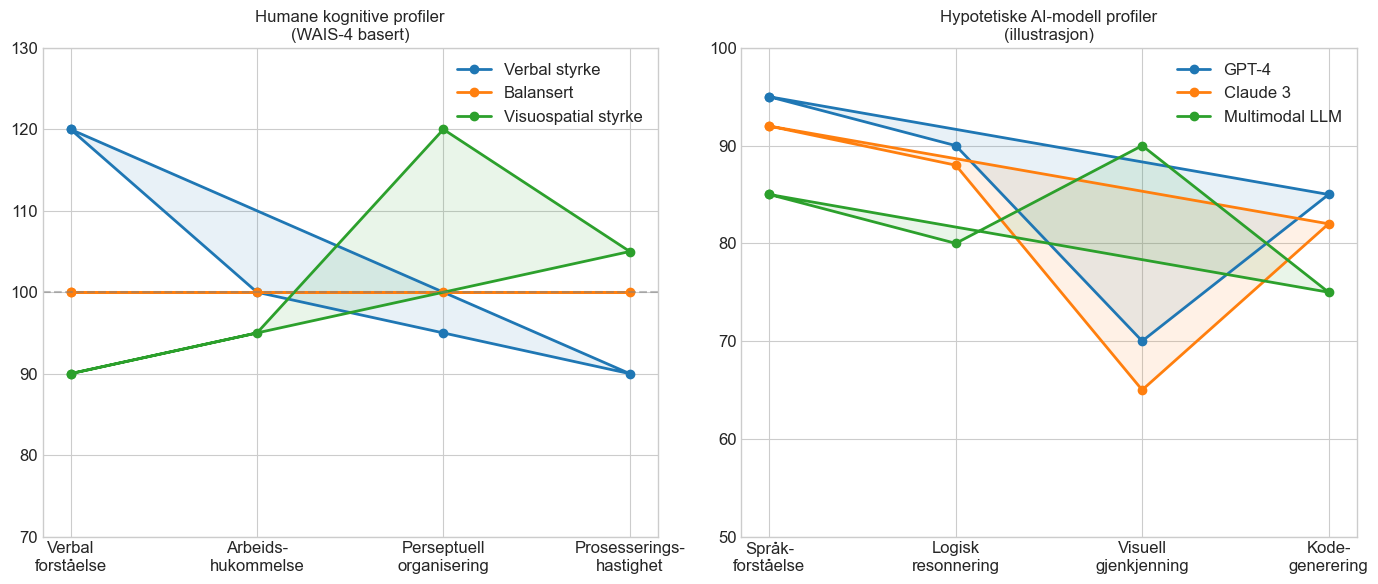


Figur 7: Paralleller mellom humane og AI-baserte 'kognitive' profiler.
  Venstre: Faktiske humane profiler basert på WAIS-4 indekser.
  Høyre: Hypotetiske AI-profiler (illustrasjon - ikke ekte data).
  Hovedpoeng: Både mennesker og AI har styrker og svakheter.
  PSN-tilnærmingen kunne teoretisk brukes for begge!


In [16]:
# ============================================================================
# VISUALISERING: HI-PROFILER SOM INSPIRASJON FOR AI-TENKNING
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Human kognitive profiler (fra våre data)
ax1 = axes[0]
categories = ['Verbal\nforståelse', 'Arbeids-\nhukommelse', 'Perseptuell\norganisering', 'Prosesserings-\nhastighet']
angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

# Tre eksempelprofiler
profiles = [
    ('Verbal styrke', [120, 100, 95, 90]),
    ('Balansert', [100, 100, 100, 100]),
    ('Visuospatial styrke', [90, 95, 120, 105])
]

for name, values in profiles:
    values_plot = values + [values[0]]
    ax1.plot(angles, values_plot, 'o-', linewidth=2, label=name)
    ax1.fill(angles, values_plot, alpha=0.1)

ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(categories)
ax1.set_ylim(70, 130)
ax1.axhline(100, color='gray', linestyle='--', alpha=0.5)
ax1.legend(loc='upper right')
ax1.set_title('Humane kognitive profiler\n(WAIS-4 basert)', fontsize=12)

# 2. Hypotetiske AI-profiler
ax2 = axes[1]
ai_categories = ['Språk-\nforståelse', 'Logisk\nresonnering', 'Visuell\ngjenkjenning', 'Kode-\ngenerering']

ai_profiles = [
    ('GPT-4', [95, 90, 70, 85]),
    ('Claude 3', [92, 88, 65, 82]),
    ('Multimodal LLM', [85, 80, 90, 75])
]

for name, values in ai_profiles:
    values_plot = values + [values[0]]
    ax2.plot(angles, values_plot, 'o-', linewidth=2, label=name)
    ax2.fill(angles, values_plot, alpha=0.1)

ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(ai_categories)
ax2.set_ylim(50, 100)
ax2.legend(loc='upper right')
ax2.set_title('Hypotetiske AI-modell profiler\n(illustrasjon)', fontsize=12)

plt.tight_layout()
plt.show()

print("")
print("Figur 7: Paralleller mellom humane og AI-baserte 'kognitive' profiler.")
print("  Venstre: Faktiske humane profiler basert på WAIS-4 indekser.")
print("  Høyre: Hypotetiske AI-profiler (illustrasjon - ikke ekte data).")
print("  Hovedpoeng: Både mennesker og AI har styrker og svakheter.")
print("  PSN-tilnærmingen kunne teoretisk brukes for begge!")


---

## 6. Diskusjon og kliniske implikasjoner

### 6.1 Hva har vi lært?

1. **Granularitet betyr noe**: PSN på item-nivå avdekker finere nyanser enn domene-nivå.

2. **Samme IQ ≠ samme profil**: To pasienter med FSIQ=95 kan ha helt ulike styrker/svakheter.

3. **Communities representerer profiler**: Undergruppene i PSN reflekterer kognitive profiler, ikke bare IQ-nivå.

4. **Presisjonsnevropsykologi er mulig**: PSN kan identifisere lignende pasienter for persontilpasset behandling.

### 6.2 Kliniske anvendelser

| Anvendelse | Beskrivelse | PSN-bidrag |
|------------|-------------|------------|
| **Rehabilitering** | Kognitiv trening | Finn pasienter som responderte på lignende tiltak |
| **Yrkesrettledning** | Karrierevalg | Match kognitiv profil med yrkeskrav |
| **Utdanningsstøtte** | Tilpasninger | Identifiser spesifikke læringsbehov |
| **Diagnostikk** | Differensialdiagnose | Skille mellom globale vs. spesifikke vansker |
| **Prognostikk** | Forventet utvikling | Se hva som skjedde med lignende pasienter |

### 6.3 Begrensninger

- **Simulerte data**: Ekte WAIS-4 data ville gi mer realistiske resultater
- **Forenkling**: Vi inkluderer ikke alle WAIS-4 aspekter
- **Statisk analyse**: Kognisjon endres over tid
- **Kontekst mangler**: Andre faktorer (motivasjon, helse) påvirker test-prestasjon


---

## 7. Oppgaver og refleksjonsspørsmål

### 📝 Oppgaver

1. **Endre parametere**: Prøv ulike verdier for `k_nearest` i PSN-konstruksjonen. Hvordan påvirker dette antall communities?

2. **Analyser alderseffekter**: Bygg separate PSN for unge (<40) og eldre (>60). Er community-strukturen forskjellig?

3. **Utforsk item-nivået**: Hvilke deltester bidrar mest til å skille mellom communities?

### 💭 Refleksjonsspørsmål

1. **Klinisk validitet**: Hvordan ville du validere at PSN-baserte grupperinger er klinisk meningsfulle?

2. **Etiske hensyn**: Hvilke etiske utfordringer ser du med å bruke PSN for presisjonsnevropsykologi?

3. **HI vs. AI**: Tror du AI noen gang vil ha en "g-faktor"? Hvorfor/hvorfor ikke?

4. **Fremtiden**: Hvordan kan PSN kombineres med andre datakilder (bildediagnostikk, genetikk) for enda bedre pasient-matching?


---

## 8. Oppsummering

I denne notebooken har vi:

✅ Simulert realistiske WAIS-4 data for 500 individer

✅ Bygget pasient-likhetsnettverk på tre granularitetsnivåer

✅ Identifisert kognitive undergrupper gjennom community detection

✅ Demonstrert presisjonsnevropsykologi: Finne lignende pasienter

✅ Reflektert over paralleller mellom human og kunstig intelligens

**Hovedbudskap**: Pasient-likhetsnettverk er et kraftig verktøy for å avdekke kognitive profiler og muliggjøre persontilpasset nevropsykologisk vurdering og intervensjon.

---

## 📚 Videre lesning

- Wechsler, D. (2008). *WAIS-IV Technical and Interpretive Manual*. Pearson.
- Carroll, J. B. (1993). *Human Cognitive Abilities*. Cambridge University Press.
- Barabási, A.-L. et al. (2011). Network medicine: a network-based approach to human disease. *Nature Reviews Genetics*.

---

*Notebook utviklet for ELMED219 - Kunstig intelligens og beregningsbasert medisin, 2026*
